# Part 1 Data Description

In [2]:
# Set up
library(tidyverse)
library(repr)
library(tidymodels)
setwd("/home/jovyan/work/dsci-100-2025w1-group-27")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
# Load Data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1.0 Data Collection
The datasets are from UBC's DSCI100 course materials, originally collected by a UBC CS research group led by Frank Wood by setting up a minecraft server that records players' actions.

## 1.1 Players Summary

In [4]:
print(players)

# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      47
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

Above is a preview of the players dataset. There are a total  of 196 rows, each representing a player. Out of all columns, all columns except played_hours and Age are categorical. We can learn from finding unique categories for these columns below.

In [27]:
categoricals_unique <- players |>
select(experience, subscribe, gender) |>
map(unique)

hashedEmail_unique_n <- length(unique(players$hashedEmail))
hashedEmail_unique_n <- length(unique(players$name))

isNA <- colSums(is.na(players))

print(categoricals_unique)
print(email_name_unique_num)
print(isNA)

$experience
[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

$subscribe
[1]  TRUE FALSE

$gender
[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"            

$hashedEmail
[1] 196

$name
[1] 196

  experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2 


Running the code above shows that experience has five categories, subscribed column is either true or false, and gender has seven categories. Hashed emails are unique for each player, as there are 196 hashed emails. Interestingly, none of the players have the same name either, as there are 196 different names listed. One thing to note is that the age column includes two NA values, meaning we must use na.rm = TRUE when wrangling with age.

## 1.2 Sessions Summary

In [29]:
print(sessions)
isNA_sessions <- colSums(is.na(sessions))
isNA_sessions

# A tibble: 1,535 × 5
   hashedEmail         start_time end_time original_start_time original_end_time
   <chr>               <chr>      <chr>                  <dbl>             <dbl>
 1 bfce39c89d6549f2bb… 30/06/202… 30/06/2…       1719770000000     1719770000000
 2 36d9cbb4c6bc0c1a69… 17/06/202… 17/06/2…       1718670000000     1718670000000
 3 f8f5477f5a2e53616a… 25/07/202… 25/07/2…       1721930000000     1721930000000
 4 bfce39c89d6549f2bb… 25/07/202… 25/07/2…       1721880000000     1721880000000
 5 36d9cbb4c6bc0c1a69… 25/05/202… 25/05/2…       1716650000000     1716650000000
 6 bfce39c89d6549f2bb… 23/06/202… 23/06/2…       1719160000000     1719160000000
 7 fd6563a4e0f6f42735… 15/04/202… 15/04/2…       1713170000000     1713170000000
 8 ad6390295640af1ed0… 21/09/202… 21/09/2…       1726880000000     1726890000000
 9 96e190b0bf3923cd8d… 21/06/202… 21/06/2…       1718940000000     1718940000000
10 36d9cbb4c6bc0c1a69… 16/05/202… 16/05/2…       1715840000000     1715840000000
# ℹ 1,

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

Above is a preview of the sessions dataset. There are a total of 1535 rows, each representing a play session. start_time and end_time are human readable forms of orginal_start_time and original_end_time. By finding the min/max of the original start/ends, respectively, then reading the human-readables of those rows, we can find the time range in which the data was collected. Original end time contains two NA values, so we must use na.rm = TRUE for end time calculation.

In [30]:
# ?which
min_start<- which(sessions$original_start_time == min(sessions$original_start_time))
max_end <- which(sessions$original_end_time == max(sessions$original_end_time, na.rm = TRUE))

slice(sessions, min_start) |>
slice(1) |>
select(start_time)

slice(sessions, max_end) |>
select(end_time)

start_time
<chr>
06/04/2024 09:35


end_time
<chr>
26/09/2024 07:39


From this, we can learn that data collection happened between June 4th and September 26th, 2024.

# Part 2 Questions

## 2.1 Broad Question

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

## 2.2 Specific Question

We would like to know the the relationship between age and playtime, then create a prediction model.

## 2.3 What data to use

We have data for the age of each player, as well as their play time. This will allow us to plot a scatterplot, use a regression model.

# 3. Exploratory Data Analysis and Visualization

In [38]:
players_select <- select(players, played_hours, Age) |>
na.omit()
print(players_select)

# A tibble: 194 × 2
   played_hours   Age
          <dbl> <dbl>
 1         30.3     9
 2          3.8    17
 3          0      17
 4          0.7    21
 5          0.1    21
 6          0      17
 7          0      19
 8          0      21
 9          0.1    47
10          0      22
# ℹ 184 more rows


## 3.1 Mean of played_hours and Age

In [42]:
players_select_mean <- players_select |>
summarize(avg_played_hours = mean(played_hours),
          avg_Age = mean(Age))
players_select_mean

avg_played_hours,avg_Age
<dbl>,<dbl>
5.904639,21.13918


## 3.2 Visualization

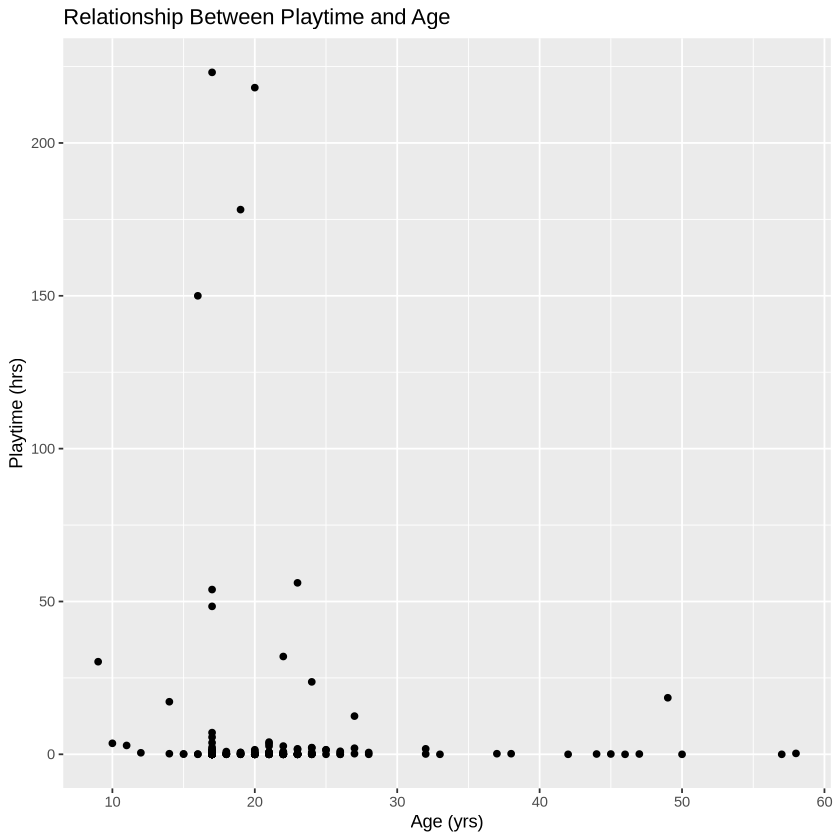

In [43]:
players_select_plot <- ggplot(players_select, aes(y = played_hours, x = Age)) + 
geom_point() +
labs(y = "Playtime (hrs)", x = "Age (yrs)", title = "Relationship Between Playtime and Age")
players_select_plot

From the visualization, there are players who have notably higher playtimes than others, which are mostly around 15-25 years old. At the same time however, there are much more datapoints around those ages, which could be the reason for that.

## 4. Methods and Plan

## 4.1 What model?

We will use a k-nn regression model.

## 4.2 Why is this method appropriate?

We would like to make a prediction on a numeric variable from a numeric variable. The visualization did not demonstrate a linear shape at all, thus a k-nn regression model is appropriate.

## 4.3 Which assumptions are required, if any, to apply the method selected?

The knn regression model requires no assumptions to be used on two numeric variables.

## 4.4 What are the potential limitations or weaknesses of the method selected?

KNN regression becomes very slow as the training data gets larger, but since our data is only 194 rows long, this should not be too big of an issue. It also may not perform well with a large number of predictors, but there is only one predictor so this is also fine. Lastly, it may not predict well beyond the range of values input in your training data. This could be problematic but with care in finding an appropriate k value, this could be ok.

## 4.5 How are you going to compare and select the model?

## 4.6 How are you going to process the data to apply the model?

We will split the data into a training and testing set, using initial_split() with a 75:25 ratio, before processing. We will use cross-validation on rmse and rmspe values to see how much over/underfitting is happening.